In [1]:
!rm -r G.A.I_MISCELLANEUS_RESOURCES mnist_data
!git clone https://github.com/Q-b1t/G.A.I_MISCELLANEUS_RESOURCES.git
!mkdir dna_dataset
!cp /content/G.A.I_MISCELLANEUS_RESOURCES/dna/dna.csv dna_dataset


rm: cannot remove 'G.A.I_MISCELLANEUS_RESOURCES': No such file or directory
rm: cannot remove 'mnist_data': No such file or directory
Cloning into 'G.A.I_MISCELLANEUS_RESOURCES'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 78 (delta 11), reused 69 (delta 5), pack-reused 0
Receiving objects: 100% (78/78), 18.26 MiB | 29.64 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/dna_dataset/dna.csv")
df.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A171,A172,A173,A174,A175,A176,A177,A178,A179,class
0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,3
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,3
2,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,3
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
4,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,2


In [4]:
df.shape

(3186, 181)

In [5]:
set(df['class'])

{1, 2, 3}

In [6]:
# verify that the data contains only the set of values {0,1}
for i in range(100):
  if len(set(df[f"A{i}"])) != 2:
    print(set(df[f"A{i}"]))

In [7]:
df.describe()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A171,A172,A173,A174,A175,A176,A177,A178,A179,class
count,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,...,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000
mean,0.232894,0.261770,0.274639,0.244507,0.268989,0.248901,0.222850,0.274639,0.263653,0.236033,...,0.225675,0.273070,0.271186,0.246390,0.269617,0.247018,0.226303,0.245763,0.299435,2.278406
std,0.422742,0.439667,0.446402,0.429862,0.443504,0.432444,0.416224,0.446402,0.440683,0.424709,...,0.418092,0.445606,0.444642,0.430976,0.443831,0.431345,0.418503,0.430606,0.458082,0.826191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [9]:
# train test split the data
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1337)

In [11]:
df.columns

Index(['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       ...
       'A171', 'A172', 'A173', 'A174', 'A175', 'A176', 'A177', 'A178', 'A179',
       'class'],
      dtype='object', length=181)

In [12]:
# separate the data into features and labels
features = [f'A{i}' for i in range(180)]
X_train,y_train = df_train[features],df_train["class"] # training data and labels
X_test,y_test = df_test[features],df_test["class"] # testing data and labels

In [13]:
model = BernoulliNB()
model.fit(
    X_train,
    y_train
)

print(f"[~] train acc: {model.score(X_train, y_train)}")
print(f"[~] test acc: {model.score(X_test, y_test)}")


[~] train acc: 0.9430926216640503
[~] test acc: 0.9404388714733543


We proceed to determine whether the data is balenced or inbalanced by computing the percentage of each class.

In [22]:
size = df.shape[0]
percentages = dict()
for c in set(df['class']):
  p = (df["class"] == c).sum() / size
  print(f"[~] Class: {c}: {p}")
  percentages[c] = p

[~] Class: 1: 0.24074074074074073
[~] Class: 2: 0.2401129943502825
[~] Class: 3: 0.5191462649089768


In [23]:
percentages

{1: 0.24074074074074073, 2: 0.2401129943502825, 3: 0.5191462649089768}

([<matplotlib.patches.Wedge at 0x7bc5e544beb0>,
 [Text(0.8001109926422726, 0.7548658155281622, '1'),
  Text(-0.7054032072234587, 0.844041654919269, '2'),
  Text(-0.06612484712342698, -1.0980107033143638, '3')])

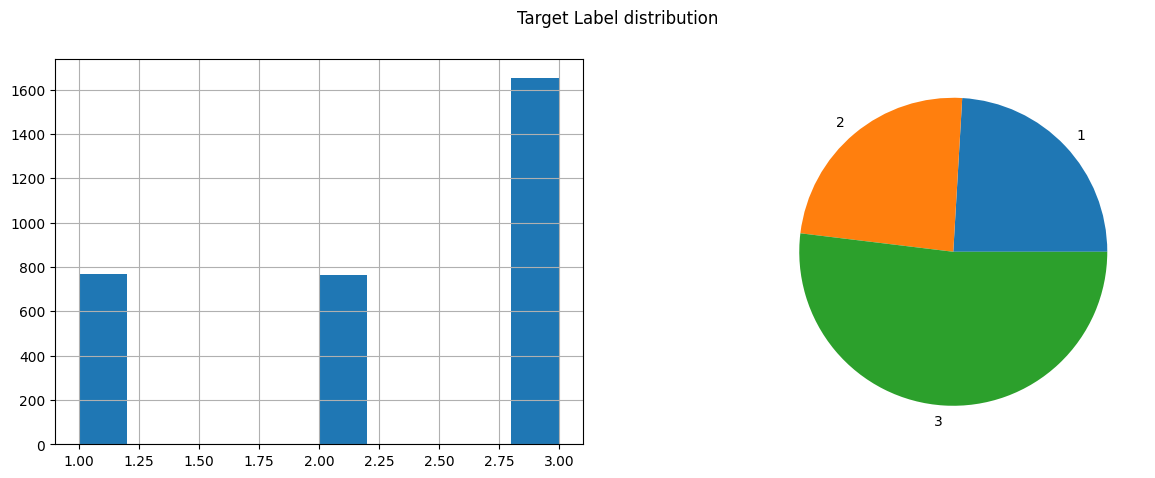

In [36]:
plt.figure(figsize = (15,5))
plt.suptitle("Target Label distribution")
plt.subplot(1,2,1)
df['class'].hist()
plt.subplot(1,2,2)
plt.pie(list(percentages.values()),labels = list(percentages.keys()))


In [37]:
# get both the prediction and the logits
p_train = model.predict(X_train)
p_test = model.predict(X_test)
pr_train = model.predict_proba(X_train)
pr_test = model.predict_proba(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

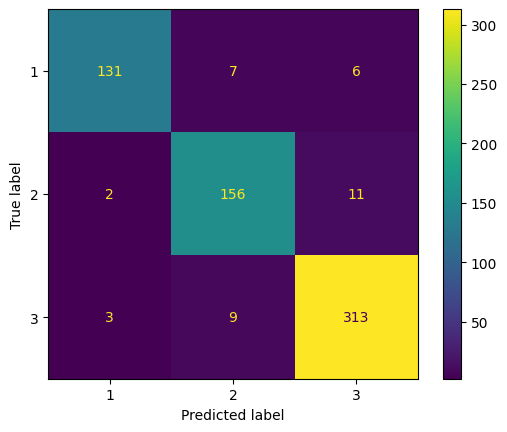

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, p_test);

From the graphs above, we can see that the proportion of data from the third class is two times bigger than classes 1 and 2, which are of the same size approximately.
Then, most of the data where preditec accurately as the counts across the heatmap's diagonal seem to hold the same poportion (```class3 = (class1 || class2) * 2```). Also, the low and high triangular sections have the least amount of data. To verify this, we will compute the F1 and the AUC scores.

In [40]:
from sklearn.metrics import f1_score, roc_auc_score

In [43]:
print(f"[~] Train F1: {f1_score(y_train, p_train, average='macro')}")
print(f"[~] Test F1: {f1_score(y_test, p_test, average='macro')}")
print(f"[~] Train AUC: {roc_auc_score(y_train, pr_train, multi_class='ovr')}")
print(f"[~] Test AUC: {roc_auc_score(y_test, pr_test, multi_class='ovr')}")

[~] Train F1: 0.9361739992087982
[~] Test F1: 0.9354651627613952
[~] Train AUC: 0.9923876759138409
[~] Test AUC: 0.9922521320875335
